Importing The necessery Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\SSN\AppData\Local\Temp\ipykernel_19192\4018103340.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


reading The Dataset

In [2]:
df=pd.read_csv("train.csv")
print("The Shape OF the Dataset : ",df.shape)

The Shape OF the Dataset :  (30000, 24)


In [3]:
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,...,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


Data Preprocessing ( Handeling the Missing Values and Remove The Un necessary Attributes ( feature Engineering ))

In [4]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

Remove the Unnecesary Attributes ( Feature Selection Technique )

In [5]:
df = df.drop(columns=['Name', 'Customer ID','Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Property ID','Property Age','Property Type','Property Location',])

In [6]:
df.columns

Index(['Gender', 'Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

Handeling Missing Values

In [7]:
print(df.isnull().sum())

Gender                           53
Age                               0
Income (USD)                   4576
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64


In [8]:
df.dtypes

Gender                          object
Age                              int64
Income (USD)                   float64
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [9]:
most_gender=df["Gender"].mode()[0]
df["Gender"]=df["Gender"].fillna(most_gender)

In [10]:
median1=df["Income (USD)"].median()
df["Income (USD)"]=df["Income (USD)"].fillna(median1)


In [11]:
median1=df["Current Loan Expenses (USD)"].median()
df["Current Loan Expenses (USD)"]=df["Current Loan Expenses (USD)"].fillna(median1)

In [12]:
df["Dependents"]=df["Dependents"].fillna(0)

In [13]:
median1=df["Credit Score"].median()
df["Credit Score"]=df["Credit Score"].fillna(median1)

In [14]:
df["Has Active Credit Card"]=df["Has Active Credit Card"].fillna("Inactive")

In [15]:
median1=df["Loan Sanction Amount (USD)"].median()
df["Loan Sanction Amount (USD)"]=df["Loan Sanction Amount (USD)"].fillna(median1)

In [16]:
df["Gender"]=df["Gender"].replace({"M":0,"F":1})
df["Has Active Credit Card"]=df["Has Active Credit Card"].replace({"Inactive":0,"Active":1,"Unpossessed":2})

C:\Users\SSN\AppData\Local\Temp\ipykernel_19192\4193822042.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"]=df["Gender"].replace({"M":0,"F":1})
C:\Users\SSN\AppData\Local\Temp\ipykernel_19192\4193822042.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Has Active Credit Card"]=df["Has Active Credit Card"].replace({"Inactive":0,"Active":1,"Unpossessed":2})


In [17]:
print(df.isnull().sum())

Gender                         0
Age                            0
Income (USD)                   0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64


In [18]:
df.dtypes

Gender                           int64
Age                              int64
Income (USD)                   float64
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card           int64
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

Linear Regression Model

Linear regression Model Fit

In [19]:
def linear_regression_Fit(X, y):

    X = np.column_stack((np.ones(len(X)), X))

    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    intercept = coefficients[0]
    coefficients = coefficients[1:]

    return coefficients, intercept

Linear regression Model Testing

In [20]:
def linear_regression_testing(x,y,coefficients,intercept):
    predictions=[]
    for i in range(len(x)):
        amount=0
        for j in range(len(coefficients)):
            amount+=coefficients[j]*x.iloc[i,j]
        amount+=intercept
        amount=amount*y[i]
        predictions.append(amount)
    return predictions

Calculating The Mean Squared Error and R^2 Score For The Linear regression Model


In [21]:
def mean_squared_Error(actual,predicted):
    sum=0
    for i in range(len(actual)):
        sum+=((predicted[i]-actual.iloc[i])*(predicted[i]-actual.iloc[i]))
    mse=sum/len(actual)
    return mse

def R2_Error(actual,predicted):
    sum1 = 0
    sum2 = 0
    mean_actual = actual.mean()
    
    for i in range(len(actual)):
        sum1 += ((actual.iloc[i] - predicted[i]) ** 2)
        sum2 += ((actual.iloc[i] - mean_actual) ** 2)
    
    r_squared = 1 - (sum1.sum() / sum2.sum())
    return r_squared


Spliting the Training and testing dataset

In [22]:
X=df.drop(columns={"Loan Sanction Amount (USD)"})
y=df["Loan Sanction Amount (USD)"]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22500, 11)
(7500, 11)
(22500,)
(7500,)


In [24]:
y_label=[]
for i in range(len(y_test)):
    if y_test.iloc[i] > 0:
        y_label.append(1)
    else:
        y_label.append(0)

Model Training For Dataset

In [25]:
coefficients,intercept=linear_regression_Fit(x_train,y_train)
print("\n\nThe Slope or Coeifficients Values \n",coefficients)
print("\n\nThe Intercept Value               :",intercept)



The Slope or Coeifficients Values 
 [ 3.31288069e+02 -5.91885164e+01 -3.20365699e-01  5.72616256e-01
 -1.74797222e+00 -1.44398045e+03  1.65547984e+02 -9.36858533e+02
  2.50499732e+02 -6.11143667e+00 -1.31792009e-02]


The Intercept Value               : -117553.02261896536


Model Testing For testing Dataset

In [26]:
predictions=linear_regression_testing(x_test,y_label,coefficients,intercept)
print(y_test)
print(predictions)

2308         0.00
22404    62192.62
23397    99950.54
25058        0.00
2664         0.00
           ...   
3211     59746.65
9355     26007.43
28201        0.00
19705    42416.56
28313    32058.35
Name: Loan Sanction Amount (USD), Length: 7500, dtype: float64
[0.0, 38947.01269103444, 66730.19742151219, 0.0, 0.0, 0.0, 97183.61812069925, 82618.29781311701, 0.0, 27583.592051869928, 137617.33205322118, 56471.70747235755, 11739.701492803462, 26044.47117577732, 80740.7577837981, 0.0, 30389.756682459527, 0.0, 22502.62156533383, 64219.55037352798, 0.0, 0.0, 4424.835025098888, -3532.991489484848, 26076.237462708435, -0.0, 47871.09064102685, 31760.555509243393, 13533.260620995745, 65652.14716958953, 0.0, 6960.744728951104, 35416.686992017116, 41803.66412287185, 70842.23967894344, 0.0, 0.0, 71505.0362773446, 18787.456452051934, 22525.528325630352, 44804.423426684516, 9251.952800143496, 55524.12937182569, 19894.40046073444, 45343.15615913572, 0.0, 0.0, 0.0, 0.0, 106312.78819219526, 112243.2517876

Calculate the Mean Squared Error and R^2 Score

In [27]:
print("\nMean Squared Error : ",mean_squared_Error(y_test,predictions))
print("R^2 Score          : ",R2_Error(y_test,predictions))
print("Accuracy is        : ",R2_Error(y_test,predictions)*100)


Mean Squared Error :  335774685.32100934
R^2 Score          :  0.8521605786409783
Accuracy is        :  85.21605786409782


Ploting The Graph For results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


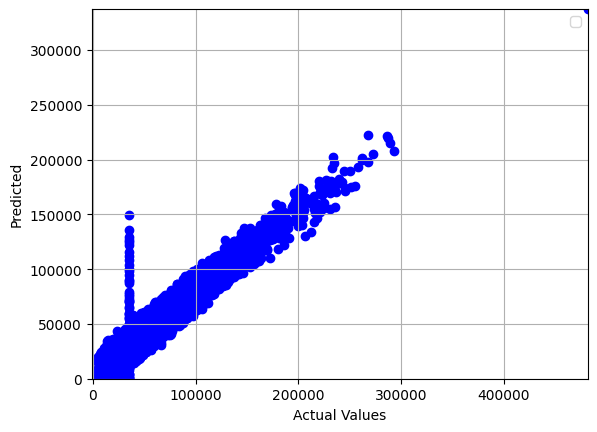

In [28]:
plt.scatter(y_test,predictions,color="blue")
plt.xlabel("Actual Values")
plt.ylabel("Predicted")
plt.legend()
plt.grid(True)
plt.xlim(min(y_test),max(y_test))
plt.ylim(0,max(predictions))
plt.show()

Conclusion

The R^2 Value is changed based on the size of the Training and the Test data size

The coeifficients and the Intercept values are obtained using the Least Square Method

If we add a Error term to the Predicted values then the error wii be reduced

The Missing values handelling mechanism plays the major role in the error